In [31]:
import numpy as np
import matplotlib.pyplot as plt
pi=np.pi
def sin(t):
    return(np.round(np.sin(t/180*pi),9))
def cos(t):
    return(np.round(np.cos(t/180*pi),9))
def ten(t):
    return(np.round(np.tan(t/180*pi),9))
def atan2(x,y):
    return(round(np.arctan2(y,x)*180/pi,5))
def DQ(x,y,z):#平移算式
    return(np.mat([[1,0,0,x],
                     [0,1,0,y],
                     [0,0,1,z],
                     [0,0,0,1]],dtype='float'))
def Rx(t):#X旋轉
    return(np.mat([[1,0,0],
                     [0,cos(t),-sin(t)],
                     [0,sin(t),cos(t)]]))
def Ry(t):#Y旋轉
    return(np.mat([[cos(t),0,sin(t)],
                     [0,1,0],
                     [-sin(t),0,cos(t)]]))
def Rz(t):#Z旋轉
    return(np.mat([[cos(t),-sin(t),0],
                     [sin(t),cos(t),0],
                     [0,0,1]]))  
def T(r,dq):#一般變換!!!
    dq[0:3,0:3]=r
    return(dq)
def Tt(r,p):#逆變換!!!
    p=-r.T*p
    return(np.vstack((np.hstack((r.T,p)),[0,0,0,1])))
def Rxyz(r,b,a):#XYZ固定角
    return(np.mat([[cos(a)*cos(b),cos(a)*sin(b)*sin(r)-sin(a)*cos(r),cos(a)*sin(b)*cos(r)+sin(a)*sin(r)],
                     [sin(a)*cos(b),sin(a)*sin(b)*sin(r)+cos(a)*cos(r),sin(a)*sin(b)*cos(r)-cos(a)*sin(r)],
                     [-sin(b),cos(b)*sin(r),cos(b)*cos(r)]]))
def Rzyz(r,b,a):#ZYZ歐拉角
    return(np.mat([[cos(a)*cos(b)*cos(r)-sin(a)*sin(r),-cos(a)*cos(b)*sin(r)-sin(a)*cos(r),cos(a)*sin(b)],
                     [sin(a)*cos(b)*cos(r)+cos(a)*sin(r),-sin(a)*cos(b)*sin(r)+cos(a)*cos(r),sin(a)*sin(b)],
                     [-sin(b)*cos(r),sin(b)*sin(r),cos(b)]]))                     
def Rk(th,x,y,z):#等效角
    return(np.mat([[x*x*(1-cos(th))+cos(th),y*x*(1-cos(th))-z*sin(th),z*x*(1-cos(th))+y*sin(th)],
                     [x*y*(1-cos(th))+z*sin(th),y*y*(1-cos(th))+cos(th),z*y*(1-cos(th))-x*sin(th)],
                     [x*z*(1-cos(th))-y*sin(th),y*z*(1-cos(th))+x*sin(th),z*z*(1-cos(th))+cos(th)]]))
def DH(i,a,alpha,d,theta):
    i-=1
    return(np.mat([[cos(theta[i]),-sin(theta[i])*cos(alpha[i]),sin(theta[i])*sin(alpha[i]),a[i]*cos(theta[i])],
                     [sin(theta[i]),cos(theta[i])*cos(alpha[i]),-cos(theta[i])*sin(alpha[i]),a[i]*sin(theta[i])],
                     [0,sin(alpha[i]),cos(alpha[i]),d[i]],
                     [0,0,0,1]]))
def SixAxisModel(a_list,alpha,d_list,theta):
    t00=DQ(0,0,0)
    t01=DH(1,a_list,alpha,d_list,theta)
    t12=DH(2,a_list,alpha,d_list,theta)
    t02=t01*t12
    t23=DH(3,a_list,alpha,d_list,theta)
    t03=t02*t23
    t34=DH(4,a_list,alpha,d_list,theta)
    t04=t03*t34
    t45=DH(5,a_list,alpha,d_list,theta)
    t05=t04*t45
    t56=DH(6,a_list,alpha,d_list,theta)
    t06=t05*t56
    t06=t01*t12*t23*t34*t45*t56
    t=[t00,t01,t02,t03,t04,t05,t06]
    return(t)
def inverse_kinematics(a_list,d_list,t06):
    theta=[0,1,2,3,4,5,6]
    o=[0,t06[0,3],t06[1,3],t06[2,3]]
    r=[[0],[0,t06[0,0],t06[0,1],t06[0,2]],[0,t06[1,0],t06[1,1],t06[1,2]],[0,t06[2,0],t06[2,1],t06[2,2]]]
    x=o[1]-d_list[5]*r[1][3]
    y=o[2]-d_list[5]*r[2][3]
    z=o[3]-d_list[5]*r[3][3]
    # print(x,y,z)
    d=round((x**2+y**2+(z-d_list[0])**2-a_list[1]**2-a_list[2]**2)/(2*a_list[1]*a_list[2]),8)
    theta[1]=atan2(x,y)
    theta[3]=(atan2(d,(1-d**2)**0.5))
    theta[2]=atan2((x**2+y**2)**0.5,z-d_list[0])-atan2(a_list[1]+a_list[2]*cos(theta[3]),a_list[2]*sin(theta[3]))
    theta[5]=atan2(r[1][3]*sin(theta[1])-r[2][3]*cos(theta[1]),(1-(r[1][3]*sin(theta[1])-r[2][3]*cos(theta[1]))**2)**0.5)
    theta[4]=atan2(r[1][3]*cos(theta[1])*cos(theta[2]+theta[3])+r[2][3]*sin(theta[1])*cos(theta[2]+theta[3])+r[3][3]*sin(theta[2]+theta[3]),-r[1][3]*cos(theta[1])*cos(theta[2]+theta[3])-r[2][3]*sin(theta[1])*sin(theta[2]+theta[3])+r[3][3]*cos(theta[2]+theta[3]))
    theta[6]=atan2(-r[1][1]*sin(theta[1])+r[2][1]*cos(theta[1]),r[1][2]*sin(theta[1])-r[2][2]*cos(theta[1]))
    return(theta)

In [32]:
# DH_Model
a_list = [0,750,750,0,0,0]
alpha =  [90,0,0,-90,90,0]
d_list = [1500,0,0,0,0,500]
thetas =  [90,45,45,30,60,90]
t06=SixAxisModel(a_list,alpha,d_list,thetas)[6]
print(t06)
theta=inverse_kinematics(a_list,d_list,t06)
print(theta)

[[ 0.00000000e+00  8.66025404e-01  5.00000000e-01  2.50000000e+02]
 [-8.66025404e-01  2.50000000e-01 -4.33012702e-01  3.13823735e+02]
 [-5.00000000e-01 -4.33012702e-01  7.50000000e-01  3.15533009e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[0, 90.0, 45.0, 45.0, 30.0, 60.0, 90.0]


[0. 0.] [0. 0.] [   0. 1500.]
[0. 0.] [  0.         530.33008575] [1500.         2030.33008575]
[0. 0.] [530.33008575 530.33008575] [2030.33008575 2780.33008535]
[0. 0.] [530.33008575 530.33008575] [2780.33008535 2780.33008535]
[0. 0.] [530.33008575 530.33008575] [2780.33008535 2780.33008535]
[  0. 250.] [530.33008575 313.82373486] [2780.33008535 3155.33008534]


C:\Users\seanray\AppData\Local\Temp/ipykernel_16944/1098462191.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


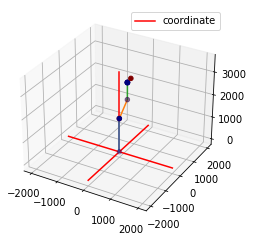

In [36]:
# 建立 3D 圖形
fig = plt.figure()
ax = fig.gca(projection='3d')
#繪製坐標軸
x=np.linspace(-2000, 2000, 100)
y=np.linspace(0,0, 100)
z=np.linspace(0,3500, 100)
ax.plot(x,y,y, color='red')   #畫出三軸資料所構成的曲面
ax.plot(y,x,y, color='red')   #畫出三軸資料所構成的曲面
ax.plot(y,y,z, color='red',label='coordinate')   #畫出三軸資料所構成的曲面
#繪製手臂位置
def plot_dot(t1,t2):
    x=np.linspace(t1[0,3],t2[0,3], 2)
    y=np.linspace(t1[1,3],t2[1,3], 2)
    z=np.linspace(t1[2,3],t2[2,3], 2)
    ax.plot(x,y,z)
    print(x,y,z)
    ax.scatter(x,y,z, c=z, cmap='jet')
t=SixAxisModel(a_list,alpha,d_list,thetas)
for i in range(6):
    plot_dot(t[i],t[i+1])
# 顯示圖例
ax.legend()
# 顯示圖形
plt.show()